# The Forward Pass
---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Forward-Pass" data-toc-modified-id="The-Forward-Pass-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Forward Pass</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Tests" data-toc-modified-id="Tests-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Tests</a></span></li><li><span><a href="#Normalize-Data" data-toc-modified-id="Normalize-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Normalize Data</a></span></li></ul></li><li><span><a href="#Why-is-it-difficult-to-train-feedforward-neural-networks?" data-toc-modified-id="Why-is-it-difficult-to-train-feedforward-neural-networks?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Why is it difficult to train feedforward neural networks?</a></span><ul class="toc-item"><li><span><a href="#Problem:-Exploding-Activations" data-toc-modified-id="Problem:-Exploding-Activations-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Problem: Exploding Activations</a></span></li><li><span><a href="#Solution:-Xavier-Initialization" data-toc-modified-id="Solution:-Xavier-Initialization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Solution: Xavier Initialization</a></span></li><li><span><a href="#Problem:-Vanishing-Activations" data-toc-modified-id="Problem:-Vanishing-Activations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Problem: Vanishing Activations</a></span></li><li><span><a href="#Solution:-Kaiming-Initialization" data-toc-modified-id="Solution:-Kaiming-Initialization-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Solution: Kaiming Initialization</a></span></li><li><span><a href="#Shifted-Relu:-Better-Solution?" data-toc-modified-id="Shifted-Relu:-Better-Solution?-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Shifted Relu: Better Solution?</a></span></li></ul></li><li><span><a href="#Feedforward-Neural-Network" data-toc-modified-id="Feedforward-Neural-Network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feedforward Neural Network</a></span><ul class="toc-item"><li><span><a href="#Linear-Layer" data-toc-modified-id="Linear-Layer-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear Layer</a></span></li><li><span><a href="#Activation-Layer" data-toc-modified-id="Activation-Layer-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Activation Layer</a></span></li><li><span><a href="#Feedforward-Network" data-toc-modified-id="Feedforward-Network-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Feedforward Network</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Mean-Squared-Error" data-toc-modified-id="Mean-Squared-Error-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Mean Squared Error</a></span></li><li><span><a href="#Cross-Entropy-Loss" data-toc-modified-id="Cross-Entropy-Loss-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cross Entropy Loss</a></span><ul class="toc-item"><li><span><a href="#Softmax" data-toc-modified-id="Softmax-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Softmax</a></span></li><li><span><a href="#Negative-Log-Likelihood" data-toc-modified-id="Negative-Log-Likelihood-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Negative Log Likelihood</a></span></li><li><span><a href="#Cross-Entropy-Loss" data-toc-modified-id="Cross-Entropy-Loss-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Cross Entropy Loss</a></span></li></ul></li></ul></li></ul></div>

## Import Libraries

In [1]:
import math
import operator

import torch
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
dataset = MNIST(root="../data/")

In [3]:
x, y = dataset.data.float(), dataset.targets
x_train, x_test = x[:50000], x[50000:]
y_train, y_test = y[:50000], y[50000:]

x_train.shape, x_test.shape

(torch.Size([50000, 28, 28]), torch.Size([10000, 28, 28]))

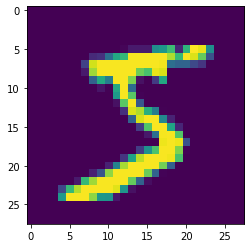

In [4]:
plt.imshow(x_train[0])

In [5]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [6]:
n, m = x_train.shape
c = (y_train.max() - y_train.min()).item()
n, m, c

(50000, 784, 9)

## Tests

In [7]:
def stats(x):
    shape = f"Shape: {' x '.join(str(dim) for dim in x.shape)}"
    mean = f"Mean: {x.mean():.3f}"
    std = f"Std: {x.std():.3f}"
    print("\n".join([shape,mean,std]))

## Normalize Data

In [8]:
def normalize(x, mean, std):
    return (x-mean)/std

In [9]:
train_mean = x_train.mean()
train_std = x_train.std()

In [10]:
x_train = normalize(x_train, train_mean, train_std)
x_test = normalize(x_test, train_mean, train_std)

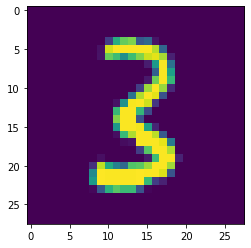

In [11]:
plt.imshow(x_test[0].view(28,28))

# Why is it difficult to train feedforward neural networks?

Based on [Understanding the difficulty of training deep feedforward neural networks](http://proceedings.mlr.press/v9/glorot10a.html) by Xavier Glorot, Yoshua Bengio ; Proceedings of the Thirteenth International Conference on Artificial Intelligence and Statistics, JMLR Workshop and Conference Proceedings 9:249-256, 2010.


## Problem: Exploding Activations

**Initializing linear layers**

In [12]:
nh1 = m//2
w1 = torch.randn(m, nh1)
b1 = torch.zeros(nh1)

nh2 = nh1//2 
w2 = torch.randn(nh1, nh2)
b2 = torch.zeros(nh2)

nh3 = nh2//2
w3 = torch.randn(nh2, nh3)
b3 = torch.zeros(nh3)

nh4 = nh3//2
w4 = torch.randn(nh3, nh4)
b4 = torch.zeros(nh4)

**Forward Pass**

In [13]:
stats(x_train)

Shape: 50000 x 784
Mean: -0.000
Std: 1.000


In [14]:
h1 = x_train@w1 + b1
stats(h1)

Shape: 50000 x 392
Mean: -1.104
Std: 28.021


In [15]:
h2 = h1@w2 + b2
stats(h2)

Shape: 50000 x 196
Mean: 2.195
Std: 560.403


In [16]:
h3 = h2@w3 + b3
stats(h3)

Shape: 50000 x 98
Mean: -675.057
Std: 8122.958


In [17]:
h4 = h3@w4 + b4
stats(h4)

Shape: 50000 x 49
Mean: 9956.677
Std: 84953.578


**We observe exploding activations as their standard deviations and mean increase drastically at every layer**

## Solution: Xavier Initialization

**Initializing linear layers with Xaiver Initialization**

In [18]:
nh1 = m//2
w1 = torch.randn(m, nh1) / math.sqrt(m)
b1 = torch.zeros(nh1)

nh2 = nh1//2 
w2 = torch.randn(nh1, nh2) / math.sqrt(nh1) 
b2 = torch.zeros(nh2)

nh3 = nh2//2
w3 = torch.randn(nh2, nh3) / math.sqrt(nh2)
b3 = torch.zeros(nh3)

nh4 = nh3//2
w4 = torch.randn(nh3, nh4) / math.sqrt(nh1)
b4 = torch.zeros(nh4)

**Forward Pass**

In [19]:
stats(x_train)

Shape: 50000 x 784
Mean: -0.000
Std: 1.000


In [20]:
h1 = x_train@w1 + b1
stats(h1)

Shape: 50000 x 392
Mean: -0.041
Std: 1.030


In [21]:
h2 = h1@w2 + b2
stats(h2)

Shape: 50000 x 196
Mean: 0.055
Std: 1.052


In [22]:
h3 = h2@w3 + b3
stats(h3)

Shape: 50000 x 98
Mean: -0.042
Std: 1.059


In [23]:
h4 = h3@w4 + b4
stats(h4)

Shape: 50000 x 49
Mean: 0.026
Std: 0.541


**The mean & std of activations remain fairly close to 0 and 1 respectively.**

## Problem: Vanishing Activations

**Linear layers with Relu activation**

In [24]:
def relu(x):
    return x.clamp_min(0.)

In [25]:
def linear_relu(x, weight, bias):
    return relu(x@weight + bias)

**Forward Pass**

In [26]:
stats(x_train)

Shape: 50000 x 784
Mean: -0.000
Std: 1.000


In [27]:
h1 = linear_relu(x_train, w1, b1)
stats(h1)

Shape: 50000 x 392
Mean: 0.385
Std: 0.597


In [28]:
h2 = linear_relu(h1, w2, b2)
stats(h2)

Shape: 50000 x 196
Mean: 0.298
Std: 0.430


In [29]:
h3 = linear_relu(h2, w3, b3)
stats(h3)

Shape: 50000 x 98
Mean: 0.204
Std: 0.320


In [30]:
h4 = linear_relu(h3, w4, b4)
stats(h4)

Shape: 50000 x 49
Mean: 0.094
Std: 0.132


**We observe the activations vanishing as their standard deviation halves approximately at every layer**

## Solution: Kaiming Initialization

**Initializing linear layers with Kaiming Initialization**

In [31]:
nh1 = m//2
w1 = torch.randn(m, nh1) * math.sqrt(2/m)
b1 = torch.zeros(nh1)

nh2 = nh1//2 
w2 = torch.randn(nh1, nh2) * math.sqrt(2/nh1) 
b2 = torch.zeros(nh2)

nh3 = nh2//2
w3 = torch.randn(nh2, nh3) * math.sqrt(2/nh2)
b3 = torch.zeros(nh3)

nh4 = nh3//2
w4 = torch.randn(nh3, nh4) * math.sqrt(2/nh1)
b4 = torch.zeros(nh4)

**Forward Pass**

In [32]:
stats(x_train)

Shape: 50000 x 784
Mean: -0.000
Std: 1.000


In [33]:
h1 = linear_relu(x_train, w1, b1)
stats(h1)

Shape: 50000 x 392
Mean: 0.535
Std: 0.812


In [34]:
h2 = linear_relu(h1, w2, b2)
stats(h2)

Shape: 50000 x 196
Mean: 0.567
Std: 0.846


In [35]:
h3 = linear_relu(h2, w3, b3)
stats(h3)

Shape: 50000 x 98
Mean: 0.513
Std: 0.848


In [36]:
h4 = linear_relu(h3, w4, b4)
stats(h4)

Shape: 50000 x 49
Mean: 0.285
Std: 0.410


**We observe the standard deviation of activations behaving much better with Kaiming initialization**

**However, the mean of the activations hover around 0.5.**

## Shifted Relu: Better Solution?

**Linear layers with shifted Relu activation**

In [37]:
def shift_relu(x):
    return x.clamp_min(0.) - 0.5

In [38]:
def linear_shift_relu(x, weight, bias):
    return shift_relu(x@weight + bias)

**Forward Pass**

In [39]:
stats(x_train)

Shape: 50000 x 784
Mean: -0.000
Std: 1.000


In [40]:
h1 = linear_shift_relu(x_train, w1, b1)
stats(h1)

Shape: 50000 x 392
Mean: 0.035
Std: 0.812


In [41]:
h2 = linear_shift_relu(h1, w2, b2)
stats(h2)

Shape: 50000 x 196
Mean: -0.054
Std: 0.681


In [42]:
h3 = linear_shift_relu(h2, w3, b3)
stats(h3)

Shape: 50000 x 98
Mean: -0.113
Std: 0.570


In [43]:
h4 = linear_shift_relu(h3, w4, b4)
stats(h4)

Shape: 50000 x 49
Mean: -0.332
Std: 0.255


**The mean of activations remain close to zero at every layer**

# Feedforward Neural Network

## Linear Layer

In [44]:
class Linear():
    '''Affine layer with weight and bias initialized using Kaiming initialization'''

    def __init__(self, in_size, out_size):
        self.weight = torch.randn(in_size, out_size) * math.sqrt(2/in_size)
        self.bias = torch.zeros(out_size)
    
    def __repr__(self):
        return f"(Linear: in={self.weight.shape[0]} out={self.weight.shape[1]})"
        
    def forward(self, x):
        return x@self.weight + self.bias

## Activation Layer

In [45]:
class ReLU():
    '''Rectified Linear Unit Layer'''
    
    def __init__(self, shift=0.):
        self.shift = shift
    
    def __repr__(self):
        return f"(ReLU: shift={self.shift})"
    
    def forward(self, x):
        return x.clamp_min(0.) - self.shift

## Feedforward Network

In [46]:
class FeedForwardNN():
    '''Feedforward neural network'''
        
    def __init__(self, x_dim, y_dim, n_layers):
        # get an exponentially spaced array of layer dimensions
        def _exp(pos): return math.ceil(x_dim * (y_dim/x_dim)**pos)
        layer_dims  = [_exp(pos/n_layers) for pos in range(0, n_layers+1)]
        # construct the list of layers
        self.layers = []
        for i in range(n_layers):
            in_dim, out_dim = layer_dims[i], layer_dims[i+1]
            self.layers.append(Linear(in_dim, out_dim))
            self.layers.append(ReLU())
        
    def forward(self, x):
        for l in self.layers:
            x = l.forward(x)
        return x

In [47]:
model = FeedForwardNN(784, 10, 5)

In [48]:
model.layers

[(Linear: in=784 out=328),
 (ReLU: shift=0.0),
 (Linear: in=328 out=137),
 (ReLU: shift=0.0),
 (Linear: in=137 out=58),
 (ReLU: shift=0.0),
 (Linear: in=58 out=24),
 (ReLU: shift=0.0),
 (Linear: in=24 out=10),
 (ReLU: shift=0.0)]

In [49]:
y_pred = model.forward(x_train)

In [50]:
y_pred.shape, y_train.shape

(torch.Size([50000, 10]), torch.Size([50000]))

# Evaluation

In [51]:
import torch.nn.functional as F

## Mean Squared Error

**Regression Model: Predicts digits as integers directly**

In [52]:
model = FeedForwardNN(784, 1, 5)
y_pred = model.forward(x_train)

In [53]:
def mse(y_pred, y_true):
    return (y_pred - y_true).pow(2).mean()

In [54]:
mse(y_pred.squeeze(-1), y_train.float())

tensor(14.9649)

In [55]:
F.mse_loss(y_pred.squeeze(-1), y_train.float())

tensor(14.9649)

## Cross Entropy Loss

**Classification Model: Predicts class probabilities of 10 digits**

In [56]:
model = FeedForwardNN(784, 10, 5)
y_pred = model.forward(x_train)

### Softmax

In [57]:
def softmax(x, dim):
    return (x.exp()/x.exp().sum(dim,keepdim=True))

In [58]:
softmax(y_pred, dim=-1).allclose(F.softmax(y_pred, dim=-1))

True

In [59]:
def log_softmax(x, dim):
    return x - x.exp().sum(dim,keepdim=True).log()

**PyTorch makes use of Log Sum Trick to stabilize the exponential computation**

Log Sum Exponetial Numerical Stability Trick:

$$\log \left ( \sum_{j=1}^{n} e^{x_{j}} \right ) = \log \left ( e^{a} \sum_{j=1}^{n} e^{x_{j}-a} \right ) = a + \log \left ( \sum_{j=1}^{n} e^{x_{j}-a} \right )$$

where a is the maximum of the $x_{j}$.

In [60]:
def logsumexp(x, dim):
    a = x.max()
    return a + ((x-a).exp().sum(dim,keepdim=True)).log()

In [61]:
def log_softmax(x, dim):
    return x - logsumexp(x, dim)

In [62]:
log_softmax(y_pred, dim=-1).allclose(F.log_softmax(y_pred, dim=-1))

True

### Negative Log Likelihood

$$ L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) \hspace{0.5in} $$

In [63]:
def nll_loss(input, target):
    return -input[range(target.shape[0]), target].mean()

In [64]:
sm_pred = log_softmax(y_pred, dim=-1)
nll_loss(sm_pred, y_train).allclose(F.nll_loss(sm_pred, y_train))

True

### Cross Entropy Loss

In [65]:
def cross_entropy(input, target):
    return nll_loss(log_softmax(input, dim=-1), target)

**Check our implementation with PyTorch**

In [66]:
cross_entropy(y_pred, y_train).allclose(F.cross_entropy(y_pred, y_train))

True

___